  # **Detailed Study of Which Model to prefer based on Dataset or Which model to prefer when?**


***presented by:Darshana Subhash***

<B>1.Given the dataset is “data.txt”, contains 14 EEG values and the corresponding labels: 0 – closedstate and 1- open state.

Split the data into 90% for training and 10 % for testing for the following experiments. Each of theexperiment must contain the confusion matrix, Precision, Recall, F1-Score and Accuracy. <B>

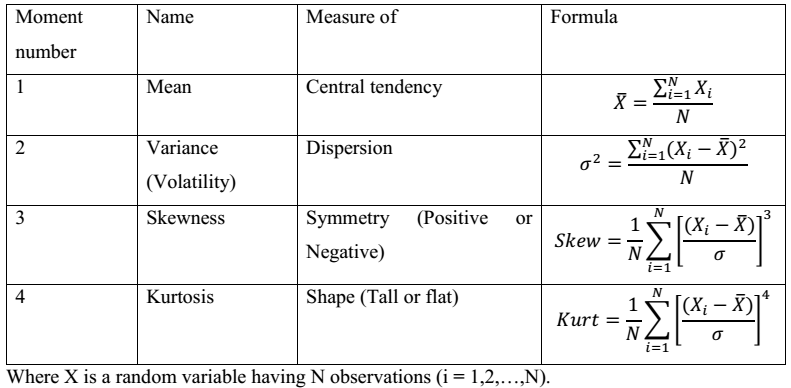

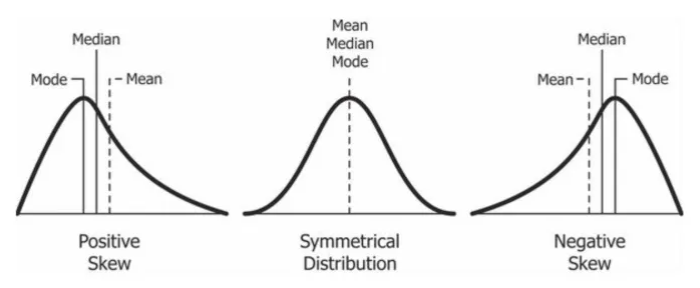

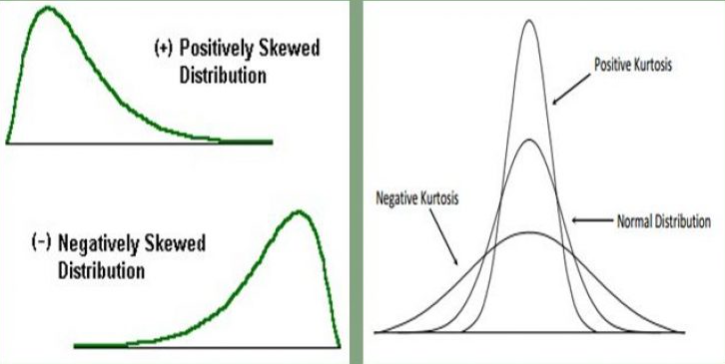

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import warnings
warnings.filterwarnings("ignore")

In [12]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))
print(raw_data)

          Col1     Col2     Col3     Col4  ...    Col12    Col13    Col14  Class
0      4329.23  4009.23  4289.23  4148.21  ...  4280.51  4635.90  4393.85      0
1      4324.62  4004.62  4293.85  4148.72  ...  4279.49  4632.82  4384.10      0
2      4327.69  4006.67  4295.38  4156.41  ...  4282.05  4628.72  4389.23      0
3      4328.72  4011.79  4296.41  4155.90  ...  4287.69  4632.31  4396.41      0
4      4326.15  4011.79  4292.31  4151.28  ...  4288.21  4632.82  4398.46      0
...        ...      ...      ...      ...  ...      ...      ...      ...    ...
14975  4281.03  3990.26  4245.64  4116.92  ...  4269.23  4593.33  4340.51      1
14976  4276.92  3991.79  4245.13  4110.77  ...  4259.49  4590.26  4333.33      1
14977  4277.44  3990.77  4246.67  4113.85  ...  4257.95  4591.79  4339.49      1
14978  4284.62  3991.79  4251.28  4122.05  ...  4267.18  4596.41  4350.77      1
14979  4287.69  3997.44  4260.00  4121.03  ...  4274.36  4597.95  4350.77      1

[14980 rows x 15 columns]


<B>i) Derive the statistical features: mean, min, max, stddev, skewness, kurtosis.<B> 

In [13]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))
label=raw_data['Class']
Target=pd.DataFrame(label,columns=['Label'])
data=raw_data.drop('Class',axis=1)
Mean=data.mean(axis=1)
Min=data.min(axis=1)
Max=data.max(axis=1)
Stddev=data.std(axis=1)
Skewness=data.skew(axis=1)
Kurtosis=data.kurt(axis=1)

df=pd.DataFrame(Mean,columns=['Mean'])
df1=pd.DataFrame(Min,columns=['Min'])
df2=pd.DataFrame(Max,columns=['Max'])
df3=pd.DataFrame(Stddev,columns=['Stddev'])
df4=pd.DataFrame(Skewness,columns=['Skewness'])
df5=pd.DataFrame(Kurtosis,columns=['Kurtosis'])

vertical_stack = pd.concat([df,df1,df2,df3,df4,df5], axis=1)
df=pd.DataFrame(vertical_stack)
Statistical_Features=df
Statistical_Features

,Mean,Min,Max,Stddev,Skewness,Kurtosis
0,4316.593571,4009.23,4641.03,193.431537,0.493804,-0.423702
1,4312.748571,4004.62,4638.97,193.848817,0.516201,-0.404560
2,4312.160714,4006.67,4630.26,191.577798,0.498363,-0.434202
3,4316.227143,4011.79,4632.31,190.543938,0.475085,-0.438601
4,4316.190000,4011.79,4632.82,191.157855,0.466112,-0.467151
...,...,...,...,...,...,...
14975,4291.538571,3990.26,4625.64,197.914372,0.612271,-0.387546
14976,4287.508571,3991.79,4621.54,198.327195,0.644776,-0.400887
14977,4287.838571,3990.77,4623.59,199.105595,0.641817,-0.415883
14978,4293.552857,3991.79,4628.72,198.490982,0.616735,-0.410967


**Split the data into 90% for training and 10 % for testing for the following experiments. Each of the experiment must contain the confusion matrix, Precision, Recall, F1-Score and Accuracy.**

(ii) **Apply the following machine learning algorithms: Decision tree, Random Forest and SVM on the statistical features.**


**1.Decision tree**

In [14]:
#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.10)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[[696 106]
 [109 587]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       802
           1       0.85      0.84      0.85       696

    accuracy                           0.86      1498
   macro avg       0.86      0.86      0.86      1498
weighted avg       0.86      0.86      0.86      1498



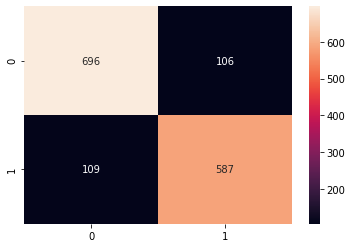

In [ ]:
y_pred = classifier.predict(X_test)
CM=confusion_matrix(y_test, y_pred)
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
print(confusion_matrix(y_test, y_pred))
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

[[705 141]
 [125 527]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       846
           1       0.79      0.81      0.80       652

    accuracy                           0.82      1498
   macro avg       0.82      0.82      0.82      1498
weighted avg       0.82      0.82      0.82      1498



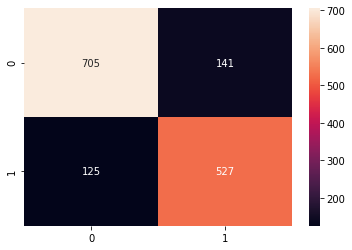

In [ ]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))

Label=raw_data['Class']
Target=pd.DataFrame(Label,columns=['Label'])
raw_data=raw_data.drop('Class',axis=1)
#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(raw_data,Label, test_size=0.10)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
CM=confusion_matrix(y_test, y_pred)
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
print(confusion_matrix(y_test, y_pred))
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

**2.Random Forest**

[[801  34]
 [ 48 615]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       835
           1       0.95      0.93      0.94       663

    accuracy                           0.95      1498
   macro avg       0.95      0.94      0.94      1498
weighted avg       0.95      0.95      0.95      1498



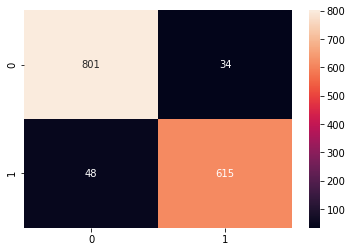

In [16]:
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

[[803  31]
 [ 61 603]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       834
           1       0.95      0.91      0.93       664

    accuracy                           0.94      1498
   macro avg       0.94      0.94      0.94      1498
weighted avg       0.94      0.94      0.94      1498



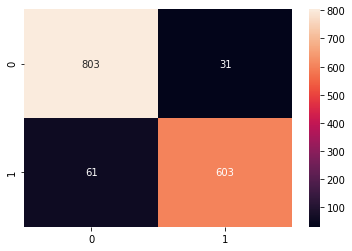

In [ ]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))

Label=raw_data['Class']
Target=pd.DataFrame(Label,columns=['Label'])
raw_data=raw_data.drop('Class',axis=1)
#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(raw_data,Label, test_size=0.10)

classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

**3.SVM**

[[621 181]
 [337 359]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       802
           1       0.66      0.52      0.58       696

    accuracy                           0.65      1498
   macro avg       0.66      0.65      0.64      1498
weighted avg       0.66      0.65      0.65      1498



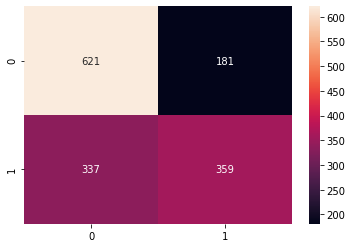

In [ ]:
classifier = svm.SVC(kernel='linear') # Linear Kernel
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

[[650 195]
 [344 309]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.71       845
           1       0.61      0.47      0.53       653

    accuracy                           0.64      1498
   macro avg       0.63      0.62      0.62      1498
weighted avg       0.64      0.64      0.63      1498



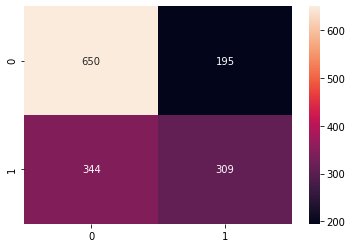

In [ ]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))

Label=raw_data['Class']
Target=pd.DataFrame(Label,columns=['Label'])
raw_data=raw_data.drop('Class',axis=1)
#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(raw_data,Label, test_size=0.10)

classifier = svm.SVC(kernel='linear') # Linear Kernel
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

<B>(iii) Design your own NN architecture using the raw data.</B>

Epoch 1/40
68/68 [==============================] - 1s 3ms/step - loss: 271.8080 - accuracy: 0.4997
Epoch 2/40
68/68 [==============================] - 0s 2ms/step - loss: 99.1575 - accuracy: 0.5059
Epoch 3/40
68/68 [==============================] - 0s 2ms/step - loss: 48.6984 - accuracy: 0.5027
Epoch 4/40
68/68 [==============================] - 0s 3ms/step - loss: 87.5061 - accuracy: 0.5104
Epoch 5/40
68/68 [==============================] - 0s 3ms/step - loss: 27.4348 - accuracy: 0.5084
Epoch 6/40
68/68 [==============================] - 0s 3ms/step - loss: 28.2333 - accuracy: 0.5050
Epoch 7/40
68/68 [==============================] - 0s 3ms/step - loss: 31.9764 - accuracy: 0.5009
Epoch 8/40
68/68 [==============================] - 0s 3ms/step - loss: 27.3896 - accuracy: 0.5147
Epoch 9/40
68/68 [==============================] - 0s 2ms/step - loss: 13.2238 - accuracy: 0.5049
Epoch 10/40
68/68 [==============================] - 0s 3ms/step - loss: 18.5983 - accuracy: 0.5071
Epoch 11

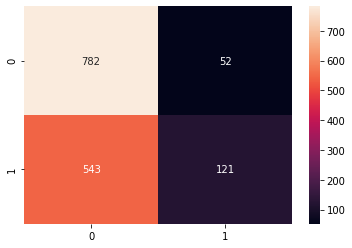

In [28]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))

Label=raw_data['Class']
Target=pd.DataFrame(Label,columns=['Label'])
raw_data=raw_data.drop('Class',axis=1)
#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(raw_data,Label, test_size=0.10)

# define the keras model
model1 = Sequential()
model1.add(Dense(256, input_dim=14, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# fit the keras model on the dataset
history=model1.fit(X_train, y_train, epochs=40,batch_size=200)


# evaluate the keras model
model1.evaluate(X_test,y_test)

#Confusion Matrix and Performance Metrics
y_pred = model1.predict_classes(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

<B>(iv) Design your own 1-D CNN architecture using the raw data.</B>

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 14, 128)           512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 128)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               459264    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 1026      
Total params: 460,802
Trainable params: 460,802
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
422/422 [==============================] - 1s 2ms/step - loss: 96.8263 - accuracy: 0.5116
Epoch 2/40
42

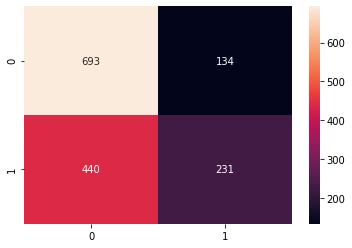

In [23]:
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))

Label=raw_data['Class']
Target=pd.DataFrame(Label,columns=['Label'])
raw_data=raw_data.drop('Class',axis=1)
#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(raw_data,Label, test_size=0.10)

#Reshape train and test dataset
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
#Building model
model2 = tf.keras.Sequential([
      Conv1D(filters=128, kernel_size=(3,),padding='same',strides=(1,),activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape =(X_train.shape[1],1)),
      MaxPool1D(pool_size=(2,),strides=2, padding='valid'),
       
      Flatten(),
      Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)),
      Dense(2,activation='softmax')
  ])


model2.summary()

model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model2.fit(X_train, y_train, epochs = 40)
loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f"Test Accuracy = ", test_accuracy )


#Confusion Matrix and Performance Metrics
y_pred = model2.predict_classes(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))


<B>(v) Design your own NN architecture using the derived statistical features. </B>

Epoch 1/40
68/68 [==============================] - 1s 2ms/step - loss: 433.1433 - accuracy: 0.5044
Epoch 2/40
68/68 [==============================] - 0s 3ms/step - loss: 37.9780 - accuracy: 0.4983
Epoch 3/40
68/68 [==============================] - 0s 3ms/step - loss: 60.2889 - accuracy: 0.5149
Epoch 4/40
68/68 [==============================] - 0s 3ms/step - loss: 26.2264 - accuracy: 0.4993
Epoch 5/40
68/68 [==============================] - 0s 3ms/step - loss: 38.4665 - accuracy: 0.5012
Epoch 6/40
68/68 [==============================] - 0s 3ms/step - loss: 17.9956 - accuracy: 0.5037
Epoch 7/40
68/68 [==============================] - 0s 3ms/step - loss: 10.3688 - accuracy: 0.5038
Epoch 8/40
68/68 [==============================] - 0s 3ms/step - loss: 9.4285 - accuracy: 0.5064
Epoch 9/40
68/68 [==============================] - 0s 3ms/step - loss: 7.3824 - accuracy: 0.5161
Epoch 10/40
68/68 [==============================] - 0s 3ms/step - loss: 10.0312 - accuracy: 0.5060
Epoch 11/4

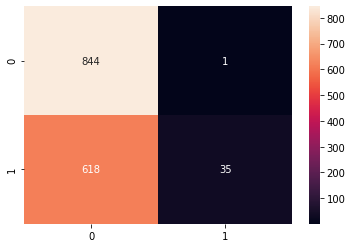

In [24]:
#Extracting Statistical Features
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))
label=raw_data['Class']
Target=pd.DataFrame(label,columns=['Label'])
data=raw_data.drop('Class',axis=1)
Mean=data.mean(axis=1)
Min=data.min(axis=1)
Max=data.max(axis=1)
Stddev=data.std(axis=1)
Skewness=data.skew(axis=1)
Kurtosis=data.kurt(axis=1)

df=pd.DataFrame(Mean,columns=['Mean'])
df1=pd.DataFrame(Min,columns=['Min'])
df2=pd.DataFrame(Max,columns=['Max'])
df3=pd.DataFrame(Stddev,columns=['Stddev'])
df4=pd.DataFrame(Skewness,columns=['Skewness'])
df5=pd.DataFrame(Kurtosis,columns=['Kurtosis'])

vertical_stack = pd.concat([df,df1,df2,df3,df4,df5], axis=1)
df=pd.DataFrame(vertical_stack)
Statistical_Features=df

#Split the data into 90% for training and 10 % for testing 
X_train, X_test, y_train, y_test = train_test_split(raw_data,Label, test_size=0.10)
# define the keras model
model3 = Sequential()
model3.add(Dense(256, input_dim=14, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# compile the keras model
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# fit the keras model on the dataset
history=model3.fit(X_train, y_train, epochs=40,batch_size=200)


# evaluate the keras model
model3.evaluate(X_test,y_test)

#Confusion Matrix and Performance Metrics
y_pred = model3.predict_classes(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

<B>(vi) Design your own 1-D CNN architecture using the derived statistical features.</B> 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 14, 256)           1024      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 256)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               918016    
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 1026      
Total params: 920,066
Trainable params: 920,066
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 45.8568 - accuracy: 0.5066
Epoch 2/20
42

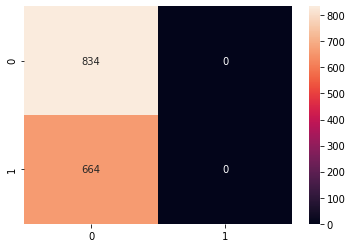

In [29]:
#Extracting Statistical Features
raw_data=pd.read_csv(r'/content/data.txt',names=('Col1','Col2','Col3','Col4','Col5','Col6','Col7','Col8','Col9','Col10','Col11','Col12','Col13','Col14','Class'))
label=raw_data['Class']
Target=pd.DataFrame(label,columns=['Label'])
data=raw_data.drop('Class',axis=1)
Mean=data.mean(axis=1)
Min=data.min(axis=1)
Max=data.max(axis=1)
Stddev=data.std(axis=1)
Skewness=data.skew(axis=1)
Kurtosis=data.kurt(axis=1)

df=pd.DataFrame(Mean,columns=['Mean'])
df1=pd.DataFrame(Min,columns=['Min'])
df2=pd.DataFrame(Max,columns=['Max'])
df3=pd.DataFrame(Stddev,columns=['Stddev'])
df4=pd.DataFrame(Skewness,columns=['Skewness'])
df5=pd.DataFrame(Kurtosis,columns=['Kurtosis'])

vertical_stack = pd.concat([df,df1,df2,df3,df4,df5], axis=1)
df=pd.DataFrame(vertical_stack)
Statistical_Features=df

X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
model4 = tf.keras.Sequential([
      Conv1D(filters=256, kernel_size=(3,),padding='same',strides=(1,),activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape =(X_train.shape[1],1)),
      MaxPool1D(pool_size=(2,),strides=2, padding='valid'),
      Flatten(),
      Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)),
      Dense(2,activation='softmax')
  ])
model4.summary()

model4.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model4.fit(X_train, y_train, epochs = 20)
loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f"Test Accuracy = ", test_accuracy )


#Confusion Matrix and Performance Metrics
y_pred = model4.predict_classes(X_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))


<B>(vii) Extract the features from the last fully connected layer from 1-D CNN architecture designed
for (iv). Give those features as input to SVM.</B>

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 459,776
Trainable params: 459,776
Non-trainable params: 0
_________________________________________________________________
(13482, 512)
(1498, 512)
[[748  86]
 [473 191]]
              precision    recall  f1-score   support

           0       0.61      0.90      0.73       834
           1       0.69      0.29      0.41       664

    accuracy                           0.63      1498
   macro avg       0.65      0.59      0.57      1498
weighted avg       0.65      0.63      0.59      1498



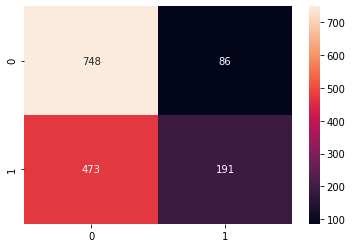

In [30]:
model_extract=Model(inputs=model2.input,outputs=model2.get_layer('dense_14').output)
model_extract.summary()
model_train=model_extract.predict(X_train)
print(model_train.shape)

model_test = model_extract.predict(X_test)
print(model_test.shape)


classifier = svm.SVC(kernel='linear') # Linear Kernel
classifier.fit(model_train, y_train)
y_pred = classifier.predict(model_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

<B>(viii) Extract the features from the last fully connected layer from 1-D CNN architecture designed
for (vi). Give those features as input to SVM. <B>

(13482, 512)
(1498, 512)
[[783  51]
 [532 132]]
              precision    recall  f1-score   support

           0       0.60      0.94      0.73       834
           1       0.72      0.20      0.31       664

    accuracy                           0.61      1498
   macro avg       0.66      0.57      0.52      1498
weighted avg       0.65      0.61      0.54      1498



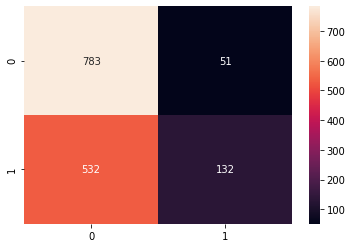

In [31]:
model_extract=Model(inputs=model4.input,outputs=model4.get_layer('dense_31').output)
model_train=model_extract.predict(X_train)
print(model_train.shape)

model_test = model_extract.predict(X_test)
print(model_test.shape)


classifier = svm.SVC(kernel='linear') # Linear Kernel
classifier.fit(model_train, y_train)
y_pred = classifier.predict(model_test)
CM=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
#labels = ['True_Neg','False_Pos','False_Neg','True_Pos']
#labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(CM, annot = True, fmt='')
ax.set_ylim(2.0, 0)
print(classification_report(y_test, y_pred))

# Inference: 

**Decision Tree** Accuracy :86%

**Random Forest** Accuracy : 95%

**SVM** Accuracy:65%

**NN(Raw data)** Accuracy:60%

**1D CNN(Raw data)** Accuracy:62%

**NN(Stat features)** Accuracy:59%

**1D CNN(Stat Features)** Accuracy:56%

**1DCNN+SVM(Raw Data)**:Accuracy:63%

**1DCNN+SVM(Statistical data)**:Accuracy:61%


**Comparison wrt Random Forest(best performing model) accuracy over other model**

**Random forest** tree approach is robust and performs better with an accuracy of 95% over other models.

**Decision trees** may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.

 **SupportVectorMachines** on the other hand suffers from outliers which makes the problem non-linearly separable, takes time to classify these outliers based on the distance of support vectors and the decision boundary.

**Convolution Neural network** are data hungry.More number of hyperparameters lacks computation to achieve better performance.
It suffers Vanishing Gradient and local minima convergence.
